# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks 
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

In [31]:
!pip install numpy pandas matplotlib scikit-learn seaborn keras

^C



[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Load the necessary libraries 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow --user

In [ ]:

%pip install keras

In [26]:
import keras
from keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [32]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [33]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
460,9,120,72,22,56,20.8,0.733,48,0
521,3,124,80,33,130,33.2,0.305,26,0
51,1,101,50,15,36,24.2,0.526,26,0
520,2,68,70,32,66,25.0,0.187,25,0
132,3,170,64,37,225,34.5,0.356,30,1


In [34]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [35]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [37]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes. 
Use the sequential model with single layer network and input shape to 8. 



In [38]:

model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200)

Epoch 1/200


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5331 - loss: 14.0865
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6405 - loss: 2.5014 
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5392 - loss: 1.0263 
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6496 - loss: 0.7212 
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6988 - loss: 0.6076 
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7008 - loss: 0.6114 
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7214 - loss: 0.5840 
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7169 - loss: 0.5623
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6950 - loss: 0.5857 
Epoch 10/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7305 - loss: 0.5583 
Epoch 11/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7179 - loss: 0.5754 
Epoch 12/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0

Normalize the data

In [39]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation 
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:

model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary 

In [42]:

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model 
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history. 


In [44]:

model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6093 - loss: 0.6904 - val_accuracy: 0.5312 - val_loss: 0.7368
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5893 - loss: 0.7194 - val_accuracy: 0.5625 - val_loss: 0.7310
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6097 - loss: 0.7084 - val_accuracy: 0.5781 - val_loss: 0.7253
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5648 - loss: 0.7337 - val_accuracy: 0.5938 - val_loss: 0.7199
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6502 - loss: 0.6664 - val_accuracy: 0.5938 - val_loss: 0.7147
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6408 - loss: 0.6943 - val_accuracy: 0.5938 - val_loss: 0.7096
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6870 - loss: 0.6648 - val_accuracy: 0.5990 - val_loss: 0.7047
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6645 - loss: 0.6803 - val_accuracy: 0.5

In [47]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model.predict(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [48]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0.55603397],
       [0.8173516 ],
       [0.30934465],
       [0.18469647],
       [0.27851406],
       [0.5602294 ],
       [0.05233209],
       [0.27764714],
       [0.8094163 ],
       [0.18840928]], dtype=float32)

In [49]:
y_pred_prob_nn_1[:10]

array([[0.55603397],
       [0.8173516 ],
       [0.30934465],
       [0.18469647],
       [0.27851406],
       [0.5602294 ],
       [0.05233209],
       [0.27764714],
       [0.8094163 ],
       [0.18840928]], dtype=float32)

Create the plot_roc function

In [50]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



In [54]:
y_pred_class_nn_1 = np.where(y_pred_prob_nn_1 > 0.5, 1, 0)

Evaluate the model performance and plot the ROC CURVE

accuracy is 0.750
roc-auc is 0.805


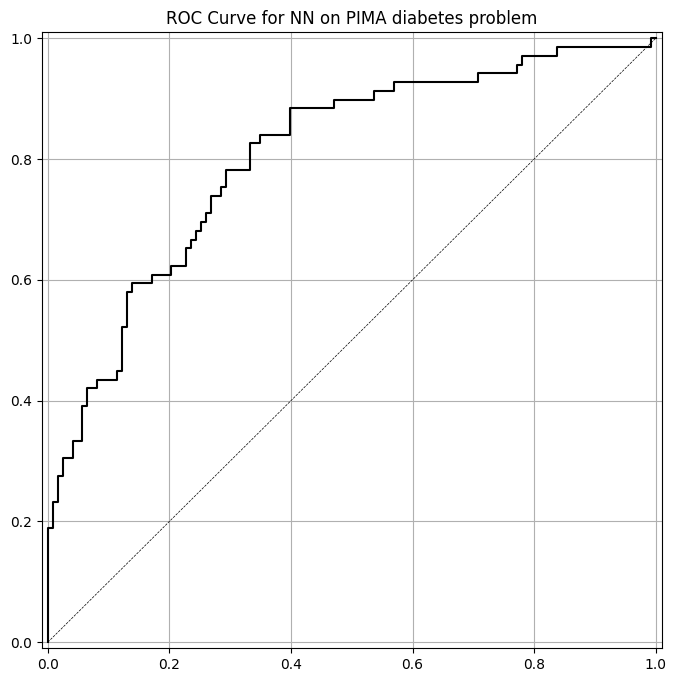

In [55]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))
plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [56]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

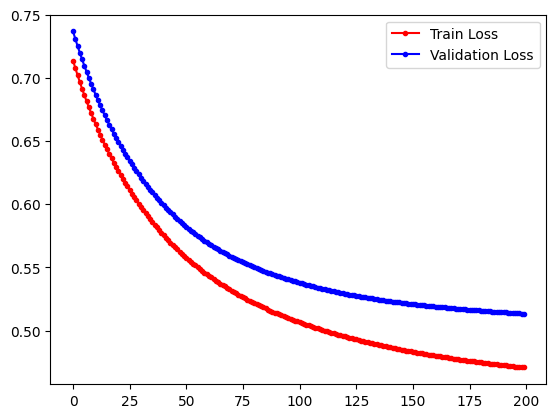

In [57]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

the train loss can be seen going downward and also the validation loss, making it the model performing well for this set since the loss is going downward indicating that the model classifies the target very well. Over all performace is great since it is going downward. The downward of the loss of both train and validation just shows how this model is performing well using this set.

#### Supplementary Activity

In [58]:
model_2 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model_2.compile(SGD(learning_rate=0.003), "binary_crossentropy", metrics=["accuracy"])

In [60]:
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4765 - loss: 0.7275 - val_accuracy: 0.4583 - val_loss: 0.7169
Epoch 2/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5226 - loss: 0.7124 - val_accuracy: 0.4740 - val_loss: 0.7119
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5421 - loss: 0.7168 - val_accuracy: 0.4948 - val_loss: 0.7073
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5222 - loss: 0.7130 - val_accuracy: 0.5208 - val_loss: 0.7030
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5671 - loss: 0.6977 - val_accuracy: 0.5365 - val_loss: 0.6989
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5723 - loss: 0.6893 - val_accuracy: 0.5417 - val_loss: 0.6950
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5969 - loss: 0.6801 - val_accuracy: 0.5677 - val_loss: 0.6912
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5585 - loss: 0.6901 - val_accur

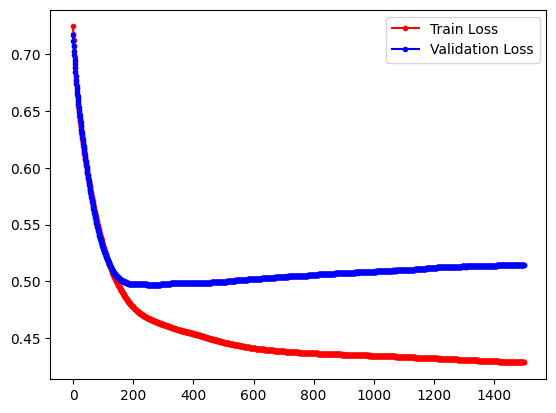

In [61]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"], 'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"], 'b', marker='.', label="Validation Loss")
ax.legend()
plt.show()


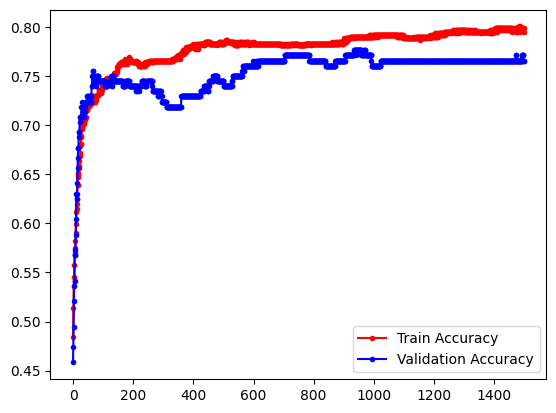

In [62]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["accuracy"], 'r', marker='.', label="Train Accuracy")
ax.plot(run_hist_2.history["val_accuracy"], 'b', marker='.', label="Validation Accuracy")
ax.legend()
plt.show()


In [63]:
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
y_pred_class_nn_2 = np.where(y_pred_prob_nn_2 > 0.5, 1, 0)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


accuracy is 0.766
roc-auc is 0.804


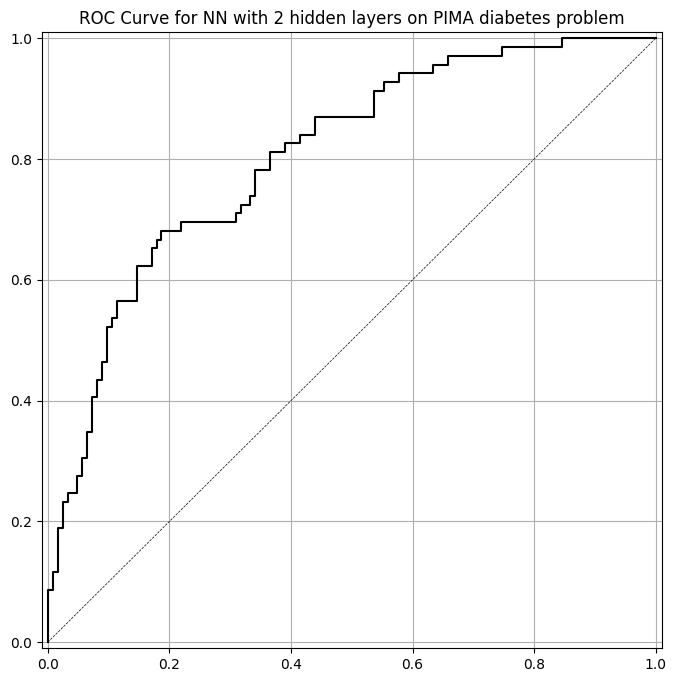

In [64]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test, y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test, y_pred_prob_nn_2)))
plot_roc(y_test, y_pred_prob_nn_2, 'NN with 2 hidden layers')

The model has an accuracy of 76.6%, indicating it correctly classifies instances. Its ROC-AUC score of 0.804 shows good discrimination between positive and negative classes, meaning it has an 80.4% chance of a positive instance higher than a negative one. Overall, the model performs well, because it also can be seen that the roc goin up, the train test also can be seen going up indicating that the model is performing well having an accuracy of 80 - 75 from its train and validation. The loss also can be seen going downward indicating that this model performs well because it can classify the right target,

#### Conclusion

Doing this activity puts me where i felt like re learning how roc and things work because i kinda not get the hang of it like how it will predict this and that, it is not that hard but it is not that easy too. I did a lot of plotting and also data anlysis where we can see a lot of downfall at loss which means the model knows what to target and also higher accuracy of the model making it a strong model for predicting, overall this activity is okay and fun to do.